Step 1: Loading a Foundry PDK

In [2]:
import numpy as np
import photonforge as pf
import siepic_forge as siepic_pdk

In [3]:
# load the technology and set is as the default
technology = siepic_pdk.ebeam()
pf.config.default_technology = technology
technology

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [4]:
technology.random_variables

[RandomVariable('si_thickness', **{'value': 0.22, 'stdev': 0.0037166666666666667}),
 RandomVariable('bottom_oxide_thickness', **{'value': 3.017, 'stdev': 0.001})]

Step 2: Loading foundry Provided PDK components

In [5]:
cross = siepic_pdk.component("crossing_horizontal")
cross

In [6]:
cross.models

{'Tidy3D': Tidy3DModel(run_time=None, medium=None, symmetry=(0, 0, 0), boundary_spec=None, monitors=(), structures=(), grid_spec=None, shutoff=None, subpixel=None, courant=None, port_symmetries=[('P0', 'P1', {'P1': 'P0', 'P2': 'P3', 'P3': 'P2'}), ('P0', 'P2', {'P1': 'P3', 'P2': 'P0', 'P3': 'P1'}), ('P0', 'P3', {'P1': 'P2', 'P2': 'P1', 'P3': 'P0'})], bounds=((None, None, None), (None, None, None)), source_gap=None, simulation_updates={}, verbose=True)}

Step 3: Convert 2D layout files to 3d for electromagnetic simulations

In [ ]:
# run 3D fdtd simulation to compute s_matrix
wavelengths = np.linspace(1.535, 1.565, 50)
s_matrix = cross.s_matrix(frequencies = pf.C_0/wavelengths)
# generate S matrix for Crossing component

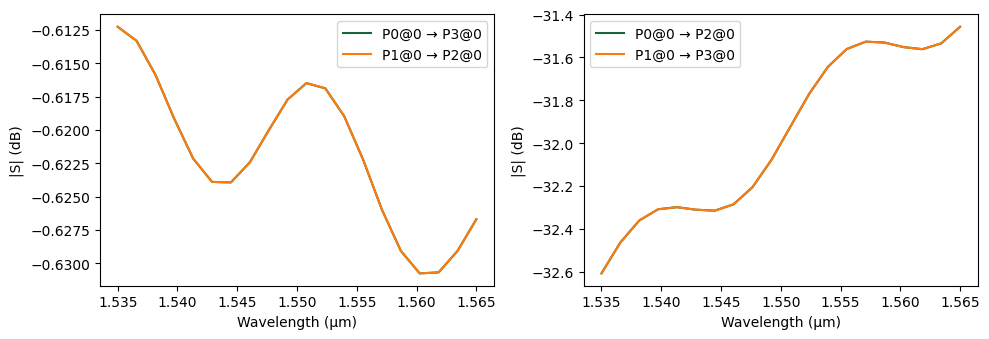

In [12]:
plt = pf.plot_s_matrix(s_matrix, y="dB", input_ports= ["P0","P1"], output_ports = ["P2", "P3"])